In [1]:
# Import Libraries
import pandas as pd

# Load your data
df = pd.read_csv("HR_Analytics.csv")

# Quick overview
print(df.head())
print(df.info())
print(df.describe())

   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1     

In [2]:
# Check null values
df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [3]:
# Drop rows with nulls in 'YearsWithCurrManager'
df = df.dropna(subset=["YearsWithCurrManager"])

In [ ]:
## EDA (Department-wise Attrition, Salary Bands, Promotions)

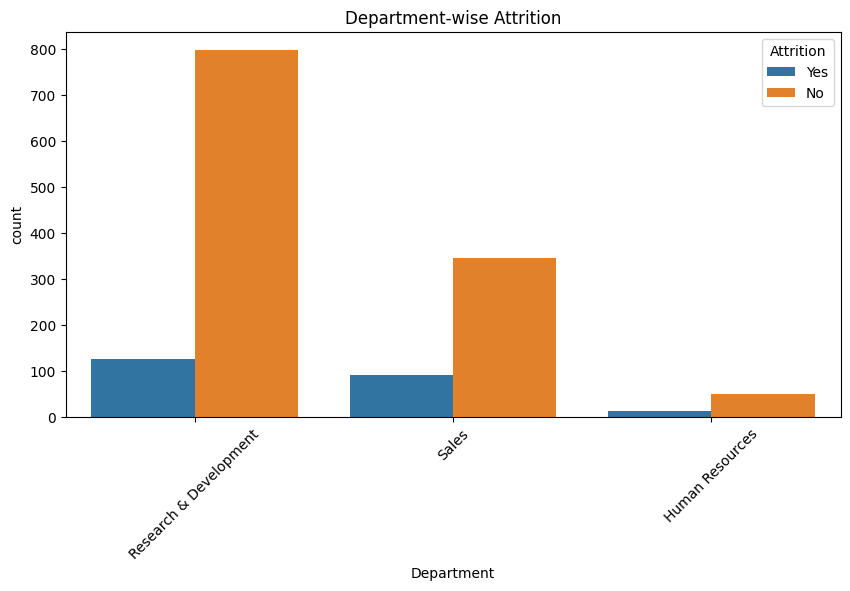

In [4]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Department-wise Attrition
## Assuming 'Department' and 'Attrition' columns
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Department-wise Attrition")
plt.xticks(rotation=45)
plt.show()

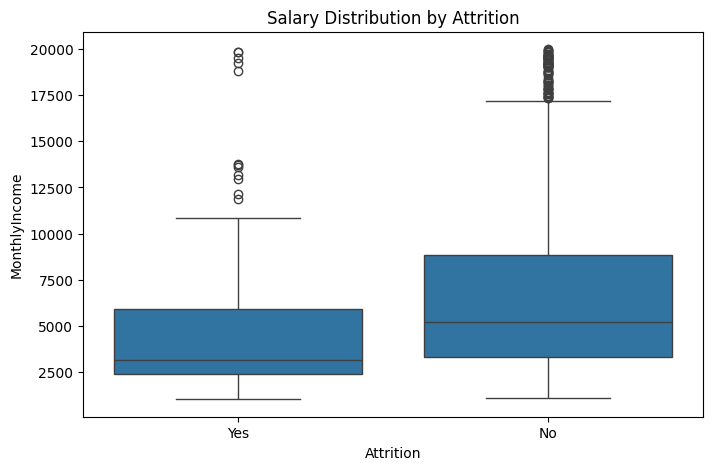

In [5]:
# Monthly Income vs. Attrition

plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Salary Distribution by Attrition")
plt.show()

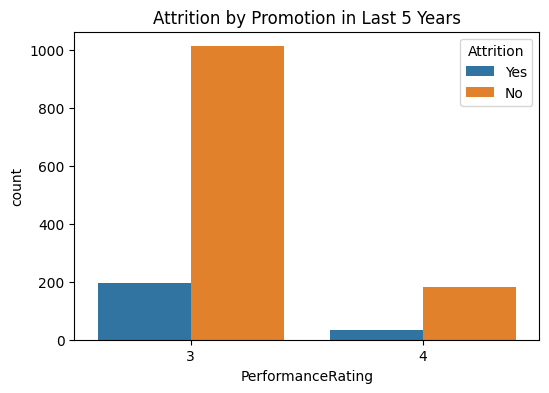

In [6]:
# Performance Rating vs. Attrition

plt.figure(figsize=(6,4))
sns.countplot(x="PerformanceRating", hue="Attrition", data=df)
plt.title("Attrition by Promotion in Last 5 Years")
plt.show()

In [ ]:
# MODELING THE DATA

In [7]:
print(df["Attrition"].unique())
print(df["Attrition"].value_counts(dropna=False))

['Yes' 'No']
Attrition
No     1193
Yes     230
Name: count, dtype: int64


In [13]:
## Encode Categorical Variables

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded["Attrition"] = df["Attrition"].map({"No":1, "Yes":0}).astype(int)

# Assign Attrition column to a new variable and the others to another variable.
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

In [14]:
# Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [23]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

In [24]:
# CONFUSION MATRIX and CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 36  10]
 [  0 239]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        46
           1       0.96      1.00      0.98       239

    accuracy                           0.96       285
   macro avg       0.98      0.89      0.93       285
weighted avg       0.97      0.96      0.96       285



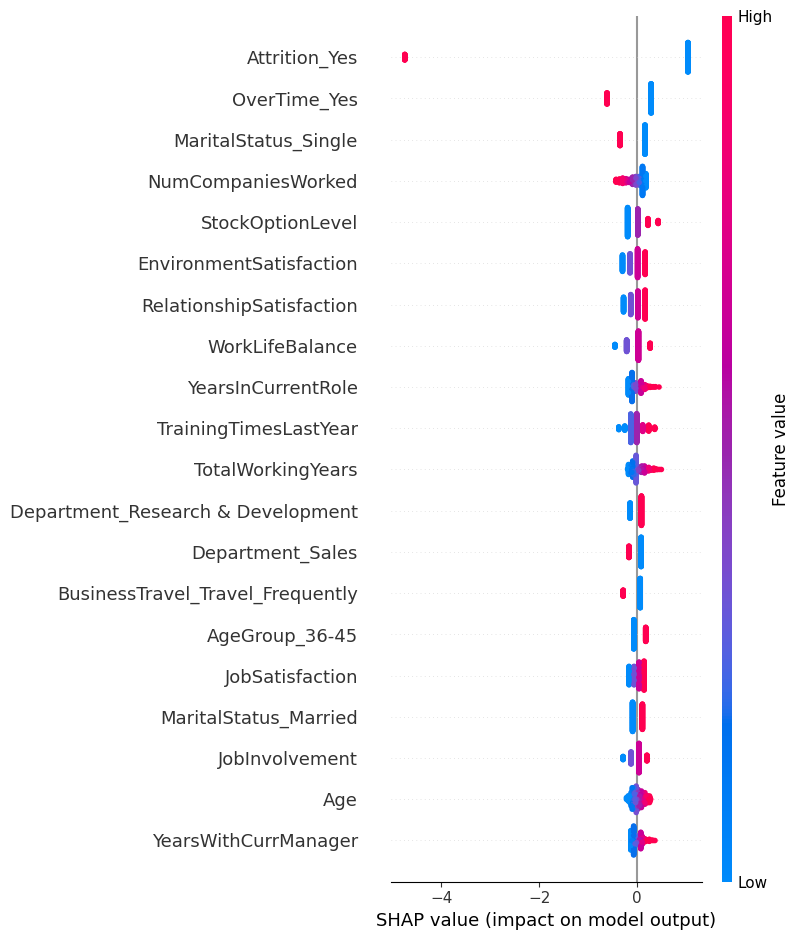

In [31]:
# Compute SHAP 
import shap

explainer = shap.LinearExplainer(lr, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

shap.summary_plot(shap_values, X_test_scaled_df)


In [32]:
## Positive SHAP = pushes prediction toward attrition
## Negative SHAP = pushes prediction toward retention

In [ ]:
## KEY HIGHLIGHTS TO TAKE 

* OverTime (Yes): Strongly increases attrition risk.
* Single Marital Status: Increases attrition likelihood.
* More companies worked: Higher attrition risk.
* Low satisfaction (environment, relationship, job): Increases attrition.
* Stock options and tenure: Higher values generally reduce attrition risk.
* Age: Younger employees are slightly more likely to leave.